# Big Mart Sales III - Analytics Vidhya Hackathon
###### This problem statement has been addressed using Cross Industry Process for Data Mining(CRISP-DM Framework)
###### Steps involved in CRISP-DM framework
1. Business Understanding
2. Data Understanding
3. Data Preperation
4. Data Modeling
5. Model Evaluation

## Business Understanding

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [147]:
import warnings
warnings.filterwarnings("ignore")

In [148]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
%matplotlib inline

In [149]:
# Load data from csv file
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [150]:
# Check dimensions of datasets
print("Train Dimension - ",train.shape,"\n","Test Dimension - ",test.shape)

Train Dimension -  (8523, 12) 
 Test Dimension -  (5681, 11)


## Data Understanding - Description
We have train (8523) and test (5681) data set in csv format, train data set has both input and output variable. Our task is to predict sales on test data.

In [151]:
print(list(train.columns),"\n\n",list(test.columns))

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'] 

 ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


### Variable       Description

- **Item_Identifier** - Unique product ID

- **Item_Weight** - Weight of product
- **Item_Fat_Content** - Whether the product is low fat or not
- **Item_Visibility** - The % of total display area of all products in a store allocated to the particular product
- **Item_Type** - The category to which the product belongs
- **Item_MRP** - Maximum Retail Price (list price) of the product
- **Outlet_Identifier** - Unique store ID
- **Outlet_Establishment_Year** - The year in which store was established
- **Outlet_Size** - The size of the store in terms of ground area covered
- **Outlet_Location_Type** - The type of city in which the store is located
- **Outlet_Type** - Whether the outlet is just a grocery store or some sort of supermarket
- **Item_Outlet_Sales** - Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [152]:
# checking first few rows
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [153]:
# checking last few rows
train.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [154]:
# seems few missing values in Item_Weight and Outlet_size
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


In [155]:
# minimum item visibility is 0, needs to be checked separately
# Outlet_Establishment_Year can be used to find age of the store
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Understanding - Visualisation(EDA)
## Univariate Analysis

In [156]:
# Filter numeric coulumns
numeric_features= train.select_dtypes(include=[np.number])
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
Item_Weight                  7060 non-null float64
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1)
memory usage: 333.0 KB


In [157]:
# correlation matrix
corr_var = numeric_features.corr()
corr_var

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


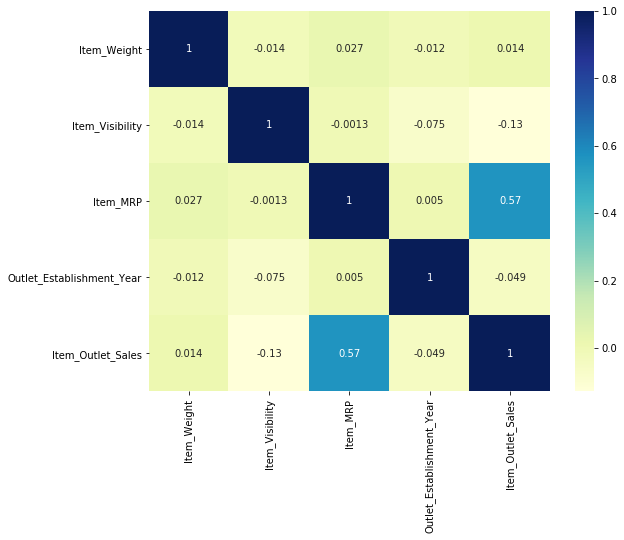

In [158]:
# Heat map representation of correlation
plt.figure(figsize=(9,7))
sns.heatmap(corr_var, cmap="YlGnBu", annot = True)
plt.show()


- **Check Item_Fat_Content**, **Item_Type**, **Outlet_Location_Type** and **Outlet_Type** - Categorical Variables

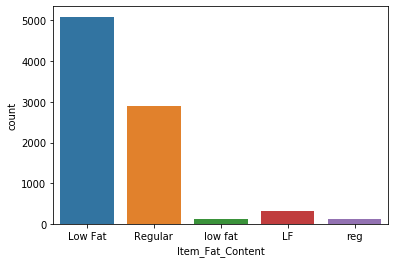

In [159]:
# Low Fat, LF and low fat are same
# Regular and reg are same
# low fat and Regular fat higher sale frequency
sns.countplot(train['Item_Fat_Content'])
plt.show()

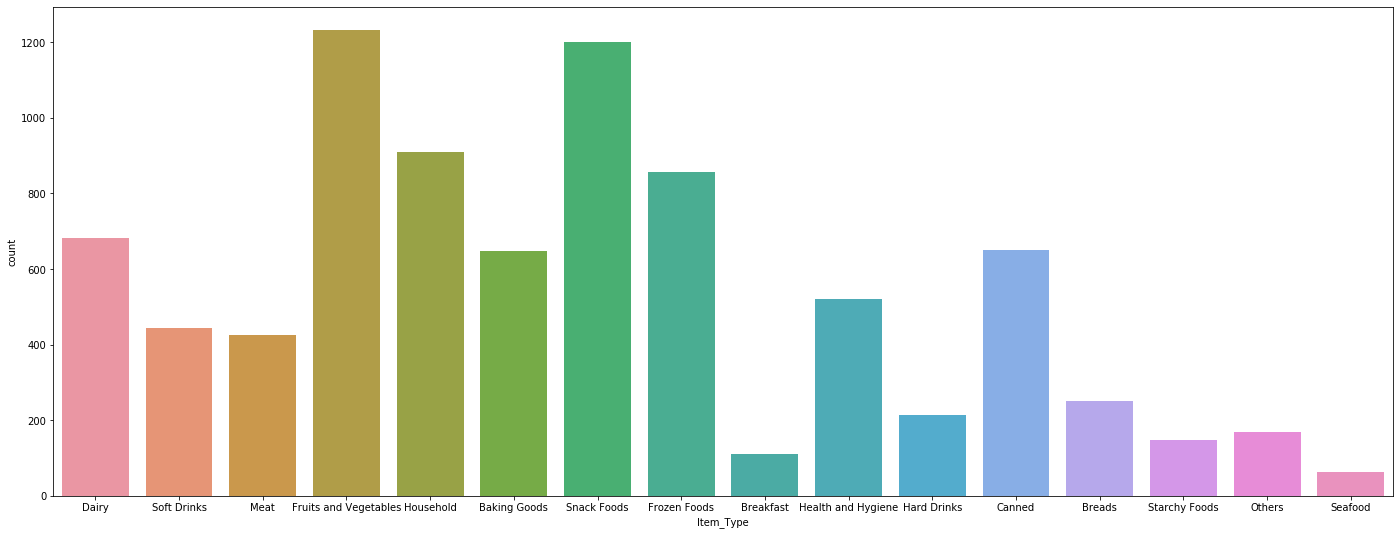

In [160]:
# Fruits and vegitables and Scanks have higher sale frequency
# Household and frozen foods are also in top 5.
plt.figure(figsize = (24,9))
sns.countplot(train['Item_Type'])
plt.show()

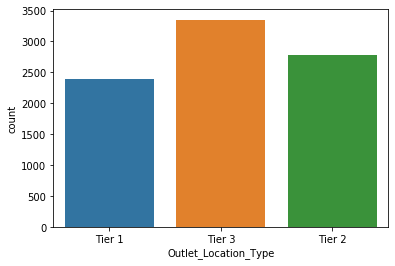

In [161]:
sns.countplot(train['Outlet_Location_Type'])
plt.show()


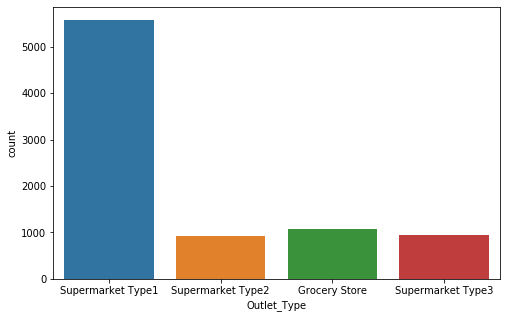

In [162]:
# most of the stores are Supermarkter Type 1
plt.figure(figsize = (8,5))
sns.countplot(train['Outlet_Type'])
plt.show()

## Bivariate Distribution
**Numeric Variables**

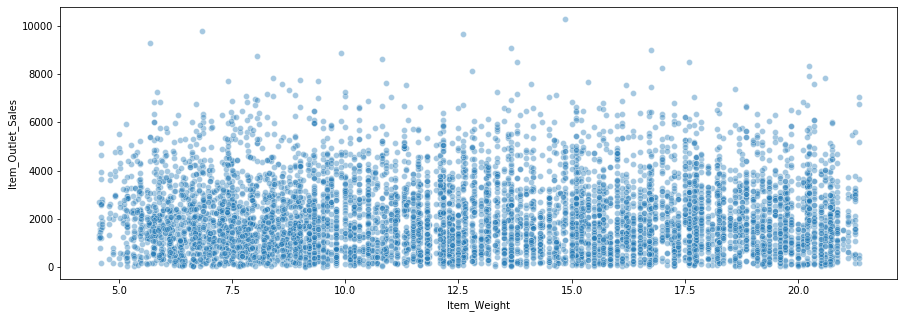

In [163]:
# Understanding Item_Weight and Item_Outlet_Sales distribution
plt.figure(figsize = (15,5))
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", alpha = 0.4, data=train)
plt.show()

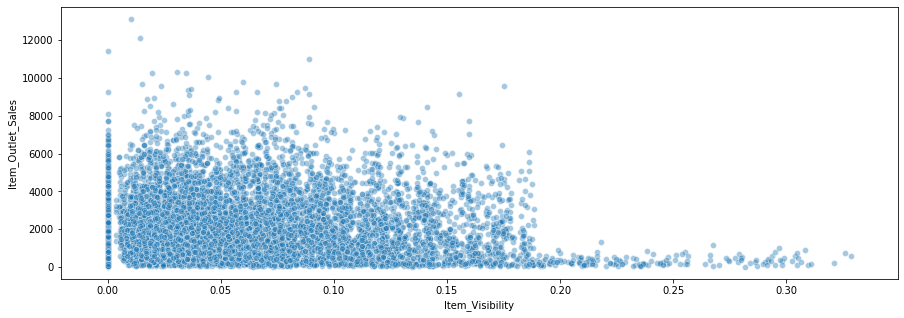

In [164]:
# Item_Visibility and Item_Outlet_Sales Analysis
plt.figure(figsize = (15,5))
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", alpha = 0.4, data=train)
plt.show()

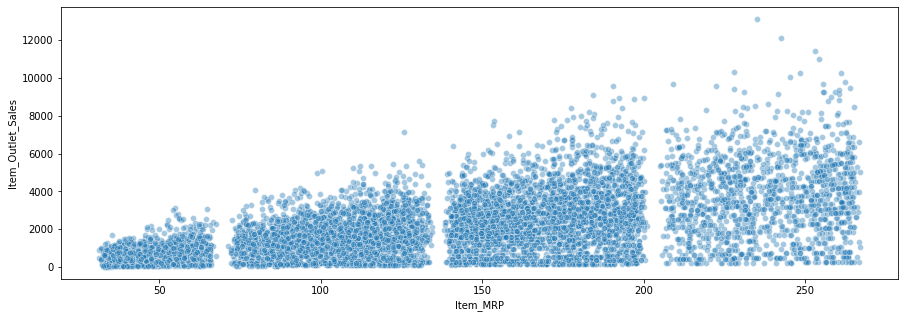

In [165]:
# Item_MRP and Item_Outlet_Sales Analysis
plt.figure(figsize = (15,5))
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", alpha = 0.4, data=train)
plt.show()

**Categorical Variables**

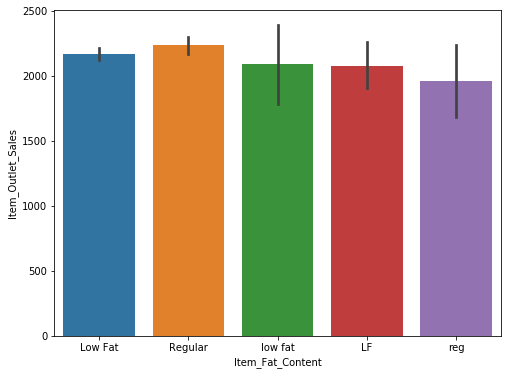

In [166]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'Item_Fat_Content', y ='Item_Outlet_Sales' , data = train)
plt.show()

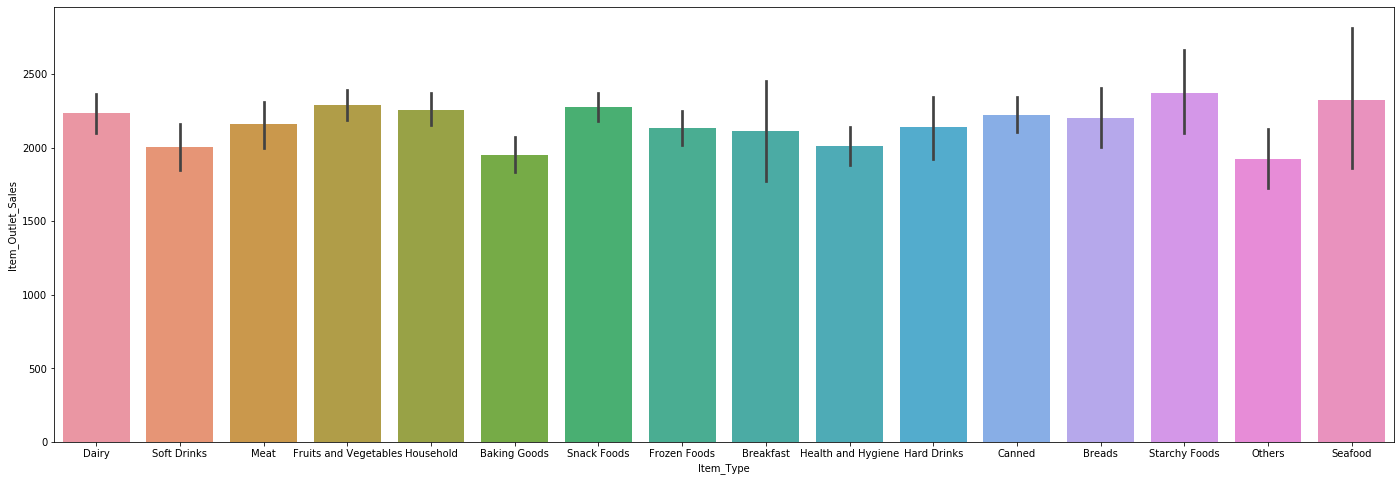

In [167]:
plt.figure(figsize=(24,8))
sns.barplot(x = 'Item_Type', y ='Item_Outlet_Sales' , data = train)
plt.show()

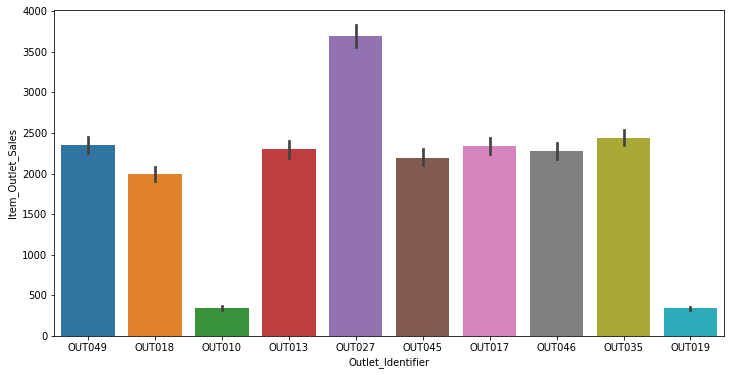

In [168]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Outlet_Identifier', y ='Item_Outlet_Sales' , data = train)
plt.show()

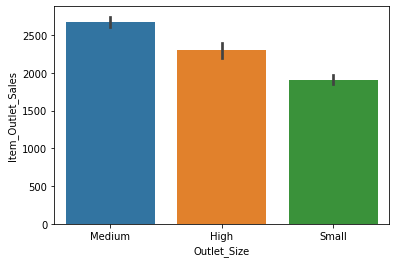

In [169]:
sns.barplot(x = 'Outlet_Size', y ='Item_Outlet_Sales' , data = train)
plt.show()

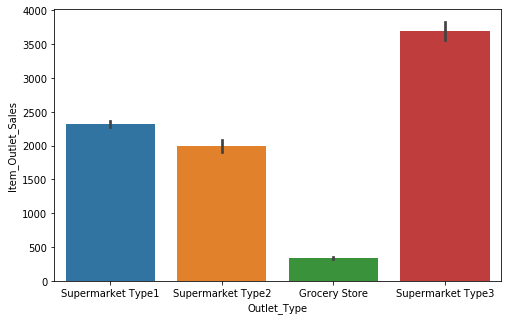

In [170]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'Outlet_Type', y ='Item_Outlet_Sales' , data = train)
plt.show()

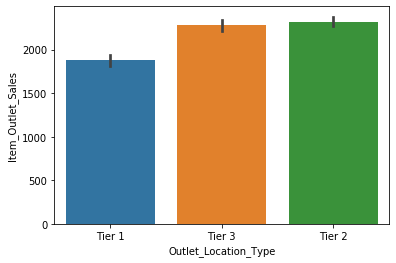

In [171]:
sns.barplot(x = 'Outlet_Location_Type', y ='Item_Outlet_Sales' , data = train)
plt.show()

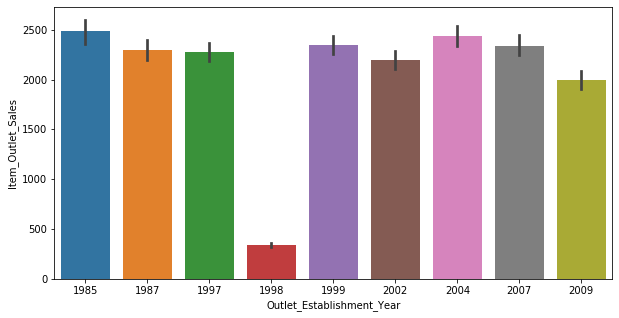

In [172]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Outlet_Establishment_Year', y ='Item_Outlet_Sales' , data = train)
plt.show()

## Data Preperation -  Data Cleaning

**Lets concat the train test data for data preperation.**

In [173]:
train['source']='train'
test['source']='test'

In [174]:
data_concat = pd.concat([train, test], ignore_index = True)
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


### Missing Values

In [175]:
# Item_Outlet_Sales  - Missing value same as test set.
# Item_weight and Outlet_Size have missing values
data_concat.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [176]:
# 17.7% missing values in Item_weight and 28.27% missing values in Outlet_Size
round(data_concat.isnull().sum()/ len(data_concat) * 100,2)

Item_Fat_Content              0.00
Item_Identifier               0.00
Item_MRP                      0.00
Item_Outlet_Sales            40.00
Item_Type                     0.00
Item_Visibility               0.00
Item_Weight                  17.17
Outlet_Establishment_Year     0.00
Outlet_Identifier             0.00
Outlet_Location_Type          0.00
Outlet_Size                  28.27
Outlet_Type                   0.00
source                        0.00
dtype: float64

**Item_weight** - It can be imputed from **Item_Identifier**, as each **Item_Identifiers** have same weight for different store. So, aggregate each **Item_Identifier** and replace missing values of **Item_weight** with respective **Item_Identifier** mean.

In [177]:
Item_Identifier_avg_wt = data_concat.pivot_table(values='Item_Weight', index='Item_Identifier')
print(Item_Identifier_avg_wt.shape,"\n",Item_Identifier_avg_wt.head(10))


(1559, 1) 
                  Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850


In [178]:
# Define a function fill_missing()
def fill_missing(data):
    Weight = data[0]
    Identifier = data[1]
    if pd.isnull(Weight):
        return Item_Identifier_avg_wt['Item_Weight'][Item_Identifier_avg_wt.index == Identifier]
    else:
        return Weight

In [179]:
data_concat["Item_Weight"] = data_concat[['Item_Weight','Item_Identifier']].apply(fill_missing, axis = 1).astype(float)

In [180]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [181]:
# no Missing values in Item_Weight
data_concat["Item_Weight"].isnull().sum()

0

**Outlet_Size** - Impute mode of **Outlet_Type** for each category

In [182]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data_concat.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [183]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [184]:
data_concat["Outlet_Size"] = data_concat[["Outlet_Size", "Outlet_Type"]].apply(impute_size_mode, axis = 1)

In [185]:
# no missing values
data_concat["Outlet_Size"].isnull().sum()

0

**Item_Visibility** has 0 as value. Since the structure of the store is undefined, impute 0 by mean of respective **Item_Identifier**

In [186]:
# Impute 0 with NaN for average calcuation.
data_concat["Item_Visibility"] = data_concat["Item_Visibility"].replace({0:'NaN'}).astype(float)

In [187]:
Item_Identifier_avg_vis = data_concat.pivot_table(values = "Item_Visibility", index = "Item_Identifier", dropna = True)
print(Item_Identifier_avg_vis.shape,"\n", Item_Identifier_avg_vis.head(10))

(1559, 1) 
                  Item_Visibility
Item_Identifier                 
DRA12                   0.044920
DRA24                   0.045646
DRA59                   0.148204
DRB01                   0.091127
DRB13                   0.007648
DRB24                   0.020596
DRB25                   0.079407
DRB48                   0.026970
DRC01                   0.020653
DRC12                   0.037862


In [188]:
def avg_vis(data):
    Visibility = data[0]
    Identifier = data[1]
    if pd.isnull(Visibility):
        return Item_Identifier_avg_vis["Item_Visibility"][Item_Identifier_avg_vis.index == Identifier]
    else:
        return Visibility

In [189]:
# zero missing values after imputation
data_concat["Item_Visibility"] = data_concat[["Item_Visibility", "Item_Identifier"]].apply(avg_vis, axis = 1).astype(float)
data_concat["Item_Visibility"].isnull().sum()

0

In [190]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


**Fixing Item_Fat_Content**

In [191]:
# replace LF and low fat with Low Fat and reg with Regular
data_concat['Item_Fat_Content'] = data_concat['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 
                                                                     'reg': 'Regular'})

In [192]:
data_concat['Item_Fat_Content'].astype('category').value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Feature Engineering

**Age of the store**
- Data is from 2013

age = 2013 - Outlet_Establishment_Year

In [193]:
# minimum is 4 year and maximum is 28 years.
data_concat['Outlet_Age'] = 2013 - data_concat['Outlet_Establishment_Year']
data_concat['Outlet_Age'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Age, dtype: float64

**Item_identifier** is alphanumeric string. First two character denotes the product category. Let extract them in new column Item_Category

In [194]:
data_concat['Item_category'] = data_concat['Item_Identifier'].apply(lambda x: x[:2])

In [195]:
# brodly three categories FD - Food, NC - Non-Consumable and DR - Drinks
data_concat['Item_category'].astype('category').value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_category, dtype: int64

In [196]:
data_concat['Item_category'] = data_concat['Item_category'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data_concat['Item_category'].astype('category').value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_category, dtype: int64

## Feature Transformation


In [197]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
Outlet_Age                   14204 non-null int64
Item_category                14204 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB


In [198]:
data_concat =  pd.get_dummies(data_concat, columns= ['Item_Fat_Content','Outlet_Location_Type','Outlet_Type',
                                                    'Item_category','Outlet_Size','Item_Type'], drop_first = True)

In [199]:
data_concat.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Age,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,14,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,4,1,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,14,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,182.0950,732.3800,0.022930,19.20,1998,OUT010,train,15,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.014670,8.93,1987,OUT013,train,26,0,...,0,0,0,1,0,0,0,0,0,0


In [200]:
data_concat.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

In [201]:
# Split train test based on source
train = data_concat.loc[data_concat['source']=="train"]
test = data_concat.loc[data_concat['source']=="test"]

In [202]:
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

### Save prepared data

In [203]:
#Export files as modified versions:
train.to_csv("D:\Python code\Big Mart Sales III/train_modified.csv",index=False)
test.to_csv("D:\Python code\Big Mart Sales III/test_modified.csv",index=False)

# Model Building

In [204]:
# load data
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [205]:
# Store id column for submission
id_column = train_df[['Item_Identifier','Outlet_Identifier']]
# Filter predictor Variable
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
X_train = train_df[predictors]
# Filter target variable
Y_train = train_df[['Item_Outlet_Sales']]



In [206]:
# import statsmodel.api
import statsmodels.api as sm

In [207]:
def modelfit(X_train, Y_train) :
    X_train_lm = sm.add_constant(X_train)
    lm = sm.OLS(Y_train, X_train).fit()
    print(lm.summary())
    return lm

In [208]:
lm_1 = modelfit(X_train, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1526.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:15:26   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8495   BIC:                                  1.442e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [210]:
def vif(X_train):
    vif = pd.DataFrame()
    vif['Feature'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [211]:
vif(X_train)

                            Feature        VIF
24                 Item_Type_Others        inf
22              Item_Type_Household        inf
21     Item_Type_Health and Hygiene        inf
11     Item_category_Non-Consumable        inf
10               Item_category_Food  54.267554
3                        Outlet_Age  21.079090
13                Outlet_Size_Small  17.226744
12               Outlet_Size_Medium  13.617023
7     Outlet_Type_Supermarket Type1  11.026430
2                       Item_Weight   8.794362
6       Outlet_Location_Type_Tier 3   7.959259
9     Outlet_Type_Supermarket Type3   6.259659
0                          Item_MRP   6.231738
5       Outlet_Location_Type_Tier 2   6.020273
27            Item_Type_Soft Drinks   5.515874
8     Outlet_Type_Supermarket Type2   5.506901
1                   Item_Visibility   3.282666
20            Item_Type_Hard Drinks   3.182692
19  Item_Type_Fruits and Vegetables   2.913042
26            Item_Type_Snack Foods   2.866148
18           

### Dropping the variable and updating the model - Item_Type_Meat

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
`Item_Type_Meat` as it has a very high p-value of `0.995`. Let's go ahead and drop this variables

In [212]:
# Drop insignificant features
X = X_train.drop('Item_Type_Meat',axis = 1)
lm_2 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1583.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:16:38   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8496   BIC:                                  1.442e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [213]:
# VIF - after dropping Item_Type_Meat
vif(X)

                            Feature        VIF
23                 Item_Type_Others        inf
22              Item_Type_Household        inf
21     Item_Type_Health and Hygiene        inf
11     Item_category_Non-Consumable        inf
10               Item_category_Food  54.266808
3                        Outlet_Age  20.599055
13                Outlet_Size_Small  16.655370
12               Outlet_Size_Medium  13.210495
7     Outlet_Type_Supermarket Type1  10.898879
2                       Item_Weight   8.790332
6       Outlet_Location_Type_Tier 3   7.826112
0                          Item_MRP   6.222359
9     Outlet_Type_Supermarket Type3   6.209632
5       Outlet_Location_Type_Tier 2   5.992997
8     Outlet_Type_Supermarket Type2   5.500061
26            Item_Type_Soft Drinks   5.262603
1                   Item_Visibility   3.278026
20            Item_Type_Hard Drinks   3.062241
19  Item_Type_Fruits and Vegetables   2.159938
25            Item_Type_Snack Foods   2.135935
4          It

### Dropping the variable and updating the model - Item_Weight

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
`Item_Weight` as it has a very high p-value of `0.978` and vif is '8.79'. Let's go ahead and drop this variables

In [214]:
# Drop insignificant features
X = X.drop('Item_Weight',axis = 1)
lm_3 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1644.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:17:53   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8497   BIC:                                  1.442e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [146]:
# VIF after rdropping Item_Weighht
vif(X)

                            Feature        VIF
10     Item_category_Non-Consumable        inf
21                 Item_Type_Others        inf
20              Item_Type_Household        inf
19     Item_Type_Health and Hygiene        inf
9                Item_category_Food  54.266689
2                        Outlet_Age  19.740920
12                Outlet_Size_Small  15.731217
11               Outlet_Size_Medium  12.572731
6     Outlet_Type_Supermarket Type1  10.614740
5       Outlet_Location_Type_Tier 3   7.603716
0                          Item_MRP   6.217265
8     Outlet_Type_Supermarket Type3   6.130973
4       Outlet_Location_Type_Tier 2   5.949673
7     Outlet_Type_Supermarket Type2   5.480085
24            Item_Type_Soft Drinks   5.224519
1                   Item_Visibility   3.273327
18            Item_Type_Hard Drinks   3.043111
17  Item_Type_Fruits and Vegetables   2.048970
23            Item_Type_Snack Foods   2.031115
3          Item_Fat_Content_Regular   1.905301
15           

### Dropping the variable and updating the model - Item_Type_Breakfast

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
`Item_Type_Breakfast` as it has a very high p-value of `0.978`. Let's go ahead and drop this variables

In [215]:
# Drop insignificant features
X = X.drop('Item_Type_Breakfast',axis = 1)
lm_4 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1710.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:20:53   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8498   BIC:                                  1.442e+05
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [216]:
vif(X)

                            Feature        VIF
10     Item_category_Non-Consumable        inf
21                 Item_Type_Others        inf
20              Item_Type_Household        inf
19     Item_Type_Health and Hygiene        inf
9                Item_category_Food  54.266689
2                        Outlet_Age  19.740920
12                Outlet_Size_Small  15.731217
11               Outlet_Size_Medium  12.572731
6     Outlet_Type_Supermarket Type1  10.614740
5       Outlet_Location_Type_Tier 3   7.603716
0                          Item_MRP   6.217265
8     Outlet_Type_Supermarket Type3   6.130973
4       Outlet_Location_Type_Tier 2   5.949673
7     Outlet_Type_Supermarket Type2   5.480085
24            Item_Type_Soft Drinks   5.224519
1                   Item_Visibility   3.273327
18            Item_Type_Hard Drinks   3.043111
17  Item_Type_Fruits and Vegetables   2.048970
23            Item_Type_Snack Foods   2.031115
3          Item_Fat_Content_Regular   1.905301
15           

In [219]:
#X = X.drop('Item_Type_Breads',axis = 1)
lm_5 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1781.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:26:36   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8499   BIC:                                  1.442e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [220]:
vif(X)

                            Feature        VIF
10     Item_category_Non-Consumable        inf
20                 Item_Type_Others        inf
19              Item_Type_Household        inf
18     Item_Type_Health and Hygiene        inf
9                Item_category_Food  54.265509
2                        Outlet_Age  19.616977
12                Outlet_Size_Small  15.595420
11               Outlet_Size_Medium  12.480611
6     Outlet_Type_Supermarket Type1  10.570288
5       Outlet_Location_Type_Tier 3   7.572264
0                          Item_MRP   6.214547
8     Outlet_Type_Supermarket Type3   6.122032
4       Outlet_Location_Type_Tier 2   5.940504
7     Outlet_Type_Supermarket Type2   5.476091
23            Item_Type_Soft Drinks   5.159812
1                   Item_Visibility   3.273319
17            Item_Type_Hard Drinks   3.011029
3          Item_Fat_Content_Regular   1.902774
16  Item_Type_Fruits and Vegetables   1.864113
22            Item_Type_Snack Foods   1.849145
14           

In [221]:
X = X.drop('Item_Type_Health and Hygiene',axis = 1)
lm_6 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1781.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:28:41   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8499   BIC:                                  1.442e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [223]:
vif(X)

                            Feature        VIF
9                Item_category_Food  54.265509
2                        Outlet_Age  19.616977
10     Item_category_Non-Consumable  17.976577
12                Outlet_Size_Small  15.595420
11               Outlet_Size_Medium  12.480611
6     Outlet_Type_Supermarket Type1  10.570288
5       Outlet_Location_Type_Tier 3   7.572264
0                          Item_MRP   6.214547
8     Outlet_Type_Supermarket Type3   6.122032
4       Outlet_Location_Type_Tier 2   5.940504
7     Outlet_Type_Supermarket Type2   5.476091
22            Item_Type_Soft Drinks   5.159812
1                   Item_Visibility   3.273319
17            Item_Type_Hard Drinks   3.011029
18              Item_Type_Household   2.760677
3          Item_Fat_Content_Regular   1.902774
16  Item_Type_Fruits and Vegetables   1.864113
21            Item_Type_Snack Foods   1.849145
14                  Item_Type_Dairy   1.728173
15           Item_Type_Frozen Foods   1.596980
13           

In [224]:
X = X.drop('Item_Type_Others',axis = 1)
lm_7 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1859.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:31:36   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8500   BIC:                                  1.442e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [225]:
vif(X)

                            Feature        VIF
9                Item_category_Food  54.265415
2                        Outlet_Age  19.614425
10     Item_category_Non-Consumable  17.230047
12                Outlet_Size_Small  15.595419
11               Outlet_Size_Medium  12.480530
6     Outlet_Type_Supermarket Type1  10.569824
5       Outlet_Location_Type_Tier 3   7.570029
0                          Item_MRP   6.214457
8     Outlet_Type_Supermarket Type3   6.121978
4       Outlet_Location_Type_Tier 2   5.940489
7     Outlet_Type_Supermarket Type2   5.475307
21            Item_Type_Soft Drinks   5.159806
1                   Item_Visibility   3.273269
17            Item_Type_Hard Drinks   3.011027
18              Item_Type_Household   2.330973
3          Item_Fat_Content_Regular   1.902774
16  Item_Type_Fruits and Vegetables   1.864113
20            Item_Type_Snack Foods   1.849145
14                  Item_Type_Dairy   1.728171
15           Item_Type_Frozen Foods   1.596980
13           

In [226]:
X = X.drop('Item_Type_Starchy Foods',axis = 1)
lm_8 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1944.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:35:02   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8501   BIC:                                  1.442e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [227]:
X = X.drop('Item_Type_Snack Foods',axis = 1)
lm_9 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2037.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:36:40   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8502   BIC:                                  1.442e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [228]:
vif(X)

                            Feature        VIF
9                Item_category_Food  54.258626
2                        Outlet_Age  19.374041
10     Item_category_Non-Consumable  16.708481
12                Outlet_Size_Small  15.337310
11               Outlet_Size_Medium  12.282029
6     Outlet_Type_Supermarket Type1  10.462178
5       Outlet_Location_Type_Tier 3   7.504560
0                          Item_MRP   6.194028
8     Outlet_Type_Supermarket Type3   6.100859
4       Outlet_Location_Type_Tier 2   5.921532
7     Outlet_Type_Supermarket Type2   5.468013
20            Item_Type_Soft Drinks   5.018487
1                   Item_Visibility   3.272803
17            Item_Type_Hard Drinks   2.940217
18              Item_Type_Household   2.330936
3          Item_Fat_Content_Regular   1.894468
14                  Item_Type_Dairy   1.496493
16  Item_Type_Fruits and Vegetables   1.444081
15           Item_Type_Frozen Foods   1.307414
13                 Item_Type_Canned   1.233596
19           

In [229]:
X = X.drop('Item_Type_Hard Drinks',axis = 1)
lm_10 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2139.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:38:26   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8503   BIC:                                  1.442e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [230]:
vif(X)

                            Feature        VIF
9                Item_category_Food  20.445209
2                        Outlet_Age  14.476687
12                Outlet_Size_Small   9.660639
6     Outlet_Type_Supermarket Type1   8.497741
11               Outlet_Size_Medium   8.378759
10     Item_category_Non-Consumable   7.227031
0                          Item_MRP   6.175855
5       Outlet_Location_Type_Tier 3   6.114760
8     Outlet_Type_Supermarket Type3   5.689282
4       Outlet_Location_Type_Tier 2   5.627577
7     Outlet_Type_Supermarket Type2   5.336857
1                   Item_Visibility   3.267361
19            Item_Type_Soft Drinks   2.372660
17              Item_Type_Household   2.330870
3          Item_Fat_Content_Regular   1.894460
16  Item_Type_Fruits and Vegetables   1.432536
15           Item_Type_Frozen Foods   1.300585
14                  Item_Type_Dairy   1.268824
13                 Item_Type_Canned   1.227815
18                Item_Type_Seafood   1.022926


In [231]:
X = X.drop('Item_category_Food',axis = 1)
lm_11 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2251.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:39:29   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8504   BIC:                                  1.442e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [232]:
vif(X)

                            Feature        VIF
2                        Outlet_Age  12.184145
6     Outlet_Type_Supermarket Type1   7.679302
11                Outlet_Size_Small   7.220897
10               Outlet_Size_Medium   6.788208
0                          Item_MRP   6.160113
5       Outlet_Location_Type_Tier 3   5.569511
8     Outlet_Type_Supermarket Type3   5.526885
4       Outlet_Location_Type_Tier 2   5.498109
7     Outlet_Type_Supermarket Type2   5.257591
1                   Item_Visibility   3.265380
9      Item_category_Non-Consumable   3.054202
16              Item_Type_Household   2.330831
3          Item_Fat_Content_Regular   1.811613
15  Item_Type_Fruits and Vegetables   1.413874
14           Item_Type_Frozen Foods   1.285933
13                  Item_Type_Dairy   1.231211
12                 Item_Type_Canned   1.217334
18            Item_Type_Soft Drinks   1.170828
17                Item_Type_Seafood   1.021838


In [233]:
X = X.drop('Item_category_Non-Consumable',axis = 1)
lm_12 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2377.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:42:30   Log-Likelihood:                         -71993.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8505   BIC:                                  1.441e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [234]:
vif(X)

                            Feature        VIF
2                        Outlet_Age  12.046315
6     Outlet_Type_Supermarket Type1   7.640037
10                Outlet_Size_Small   7.054325
9                Outlet_Size_Medium   6.697456
0                          Item_MRP   6.153740
5       Outlet_Location_Type_Tier 3   5.533905
8     Outlet_Type_Supermarket Type3   5.513914
4       Outlet_Location_Type_Tier 2   5.493804
7     Outlet_Type_Supermarket Type2   5.253269
1                   Item_Visibility   3.256004
3          Item_Fat_Content_Regular   1.701473
14  Item_Type_Fruits and Vegetables   1.348362
15              Item_Type_Household   1.318406
13           Item_Type_Frozen Foods   1.238468
12                  Item_Type_Dairy   1.189159
11                 Item_Type_Canned   1.181537
17            Item_Type_Soft Drinks   1.131409
16                Item_Type_Seafood   1.018064


In [235]:
X = X.drop('Item_Type_Soft Drinks',axis = 1)
lm_13 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2517.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:43:45   Log-Likelihood:                         -71994.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8506   BIC:                                  1.441e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [236]:
vif(X)

                            Feature        VIF
2                        Outlet_Age  12.012105
6     Outlet_Type_Supermarket Type1   7.620558
10                Outlet_Size_Small   7.009209
9                Outlet_Size_Medium   6.671359
0                          Item_MRP   6.150888
5       Outlet_Location_Type_Tier 3   5.522770
8     Outlet_Type_Supermarket Type3   5.511246
4       Outlet_Location_Type_Tier 2   5.491324
7     Outlet_Type_Supermarket Type2   5.251885
1                   Item_Visibility   3.255998
3          Item_Fat_Content_Regular   1.686435
14  Item_Type_Fruits and Vegetables   1.316735
15              Item_Type_Household   1.284089
13           Item_Type_Frozen Foods   1.216072
12                  Item_Type_Dairy   1.170198
11                 Item_Type_Canned   1.164521
16                Item_Type_Seafood   1.016311


In [237]:
X = X.drop('Item_Type_Frozen Foods',axis = 1)
lm_13 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2674.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:45:50   Log-Likelihood:                         -71994.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8507   BIC:                                  1.441e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [238]:
vif(X)

                            Feature        VIF
2                        Outlet_Age  11.996609
6     Outlet_Type_Supermarket Type1   7.596592
10                Outlet_Size_Small   6.968239
9                Outlet_Size_Medium   6.655073
0                          Item_MRP   6.150770
5       Outlet_Location_Type_Tier 3   5.515742
8     Outlet_Type_Supermarket Type3   5.510852
4       Outlet_Location_Type_Tier 2   5.491310
7     Outlet_Type_Supermarket Type2   5.250054
1                   Item_Visibility   3.255991
3          Item_Fat_Content_Regular   1.674164
13  Item_Type_Fruits and Vegetables   1.261080
14              Item_Type_Household   1.254087
12                  Item_Type_Dairy   1.141200
11                 Item_Type_Canned   1.135425
15                Item_Type_Seafood   1.013543


In [239]:
X = X.drop('Item_Type_Household',axis = 1)
lm_14 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2853.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:47:30   Log-Likelihood:                         -71994.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8508   BIC:                                  1.441e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [240]:
vif(X)

                            Feature        VIF
2                        Outlet_Age  11.968322
6     Outlet_Type_Supermarket Type1   7.583475
10                Outlet_Size_Small   6.917756
9                Outlet_Size_Medium   6.626673
0                          Item_MRP   6.129502
8     Outlet_Type_Supermarket Type3   5.506981
5       Outlet_Location_Type_Tier 3   5.500158
4       Outlet_Location_Type_Tier 2   5.490387
7     Outlet_Type_Supermarket Type2   5.249890
1                   Item_Visibility   3.254117
3          Item_Fat_Content_Regular   1.585986
13  Item_Type_Fruits and Vegetables   1.233116
12                  Item_Type_Dairy   1.121785
11                 Item_Type_Canned   1.120509
14                Item_Type_Seafood   1.011899


In [241]:
X = X.drop('Item_Type_Dairy',axis = 1)
lm_15 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              3057.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:49:10   Log-Likelihood:                         -71994.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8509   BIC:                                  1.441e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [242]:
vif(X)

                            Feature        VIF
2                        Outlet_Age  11.959664
6     Outlet_Type_Supermarket Type1   7.579875
10                Outlet_Size_Small   6.915215
9                Outlet_Size_Medium   6.624554
0                          Item_MRP   6.120038
8     Outlet_Type_Supermarket Type3   5.506534
5       Outlet_Location_Type_Tier 3   5.499955
4       Outlet_Location_Type_Tier 2   5.490286
7     Outlet_Type_Supermarket Type2   5.249035
1                   Item_Visibility   3.248826
3          Item_Fat_Content_Regular   1.582929
12  Item_Type_Fruits and Vegetables   1.208742
11                 Item_Type_Canned   1.108059
13                Item_Type_Seafood   1.010651


In [243]:
X = X.drop('Item_Visibility',axis = 1)
lm_16 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              3292.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:52:10   Log-Likelihood:                         -71994.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8510   BIC:                                  1.441e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [244]:
vif(X)

                            Feature        VIF
1                        Outlet_Age  11.364834
5     Outlet_Type_Supermarket Type1   7.492116
9                 Outlet_Size_Small   6.364361
8                Outlet_Size_Medium   6.249720
0                          Item_MRP   6.119948
3       Outlet_Location_Type_Tier 2   5.460332
4       Outlet_Location_Type_Tier 3   5.403963
7     Outlet_Type_Supermarket Type3   5.247186
6     Outlet_Type_Supermarket Type2   5.230667
2          Item_Fat_Content_Regular   1.578646
11  Item_Type_Fruits and Vegetables   1.207917
10                 Item_Type_Canned   1.107942
12                Item_Type_Seafood   1.010428


In [245]:
X = X.drop('Item_Type_Canned',axis = 1)
lm_17 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:53:21   Log-Likelihood:                         -71995.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8511   BIC:                                  1.441e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [246]:
vif(X)

                            Feature        VIF
1                        Outlet_Age  11.355201
5     Outlet_Type_Supermarket Type1   7.487650
9                 Outlet_Size_Small   6.356911
8                Outlet_Size_Medium   6.245696
0                          Item_MRP   6.119880
3       Outlet_Location_Type_Tier 2   5.459338
4       Outlet_Location_Type_Tier 3   5.403430
7     Outlet_Type_Supermarket Type3   5.247168
6     Outlet_Type_Supermarket Type2   5.228285
2          Item_Fat_Content_Regular   1.566174
10  Item_Type_Fruits and Vegetables   1.187859
11                Item_Type_Seafood   1.009447


In [247]:
X = X.drop('Item_Type_Fruits and Vegetables',axis = 1)
lm_17 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              3890.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:55:58   Log-Likelihood:                         -71995.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8512   BIC:                                  1.441e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [248]:
vif(X)

                          Feature        VIF
1                      Outlet_Age  11.343623
5   Outlet_Type_Supermarket Type1   7.485569
9               Outlet_Size_Small   6.351965
8              Outlet_Size_Medium   6.238839
0                        Item_MRP   6.116641
3     Outlet_Location_Type_Tier 2   5.457675
4     Outlet_Location_Type_Tier 3   5.400696
7   Outlet_Type_Supermarket Type3   5.245879
6   Outlet_Type_Supermarket Type2   5.228205
2        Item_Fat_Content_Regular   1.544584
10              Item_Type_Seafood   1.008022


In [249]:
X = X.drop('Item_Type_Seafood',axis = 1)
lm_18 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              4279.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:56:58   Log-Likelihood:                         -71996.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8513   BIC:                                  1.441e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [250]:
vif(X)

                         Feature        VIF
1                     Outlet_Age  11.340095
5  Outlet_Type_Supermarket Type1   7.485201
9              Outlet_Size_Small   6.351431
8             Outlet_Size_Medium   6.237962
0                       Item_MRP   6.116638
3    Outlet_Location_Type_Tier 2   5.457049
4    Outlet_Location_Type_Tier 3   5.400635
7  Outlet_Type_Supermarket Type3   5.245491
6  Outlet_Type_Supermarket Type2   5.228146
2       Item_Fat_Content_Regular   1.544341


In [251]:
X = X.drop('Item_Fat_Content_Regular',axis = 1)
lm_19 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              4752.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        04:59:11   Log-Likelihood:                         -71998.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8514   BIC:                                  1.441e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [252]:
vif(X)

                         Feature        VIF
1                     Outlet_Age  11.295103
4  Outlet_Type_Supermarket Type1   7.460866
8              Outlet_Size_Small   6.283748
7             Outlet_Size_Medium   6.192759
0                       Item_MRP   6.116334
2    Outlet_Location_Type_Tier 2   5.455372
3    Outlet_Location_Type_Tier 3   5.384871
6  Outlet_Type_Supermarket Type3   5.241458
5  Outlet_Type_Supermarket Type2   5.226888


In [253]:
X = X.drop('Outlet_Age',axis = 1)
lm_20 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              5188.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        05:00:58   Log-Likelihood:                         -72105.
No. Observations:                8523   AIC:                                  1.442e+05
Df Residuals:                    8515   BIC:                                  1.443e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [254]:
vif(X)

                         Feature       VIF
6             Outlet_Size_Medium  6.076806
0                       Item_MRP  5.834804
3  Outlet_Type_Supermarket Type1  5.705170
5  Outlet_Type_Supermarket Type3  4.654309
4  Outlet_Type_Supermarket Type2  4.626249
7              Outlet_Size_Small  4.345864
2    Outlet_Location_Type_Tier 3  3.745774
1    Outlet_Location_Type_Tier 2  3.730487


In [255]:
X = X.drop('Outlet_Size_Medium',axis = 1)
lm_21 = modelfit(X, Y_train)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              5682.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        05:02:25   Log-Likelihood:                         -72256.
No. Observations:                8523   AIC:                                  1.445e+05
Df Residuals:                    8516   BIC:                                  1.446e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [256]:
vif(X)

                         Feature       VIF
0                       Item_MRP  5.343536
3  Outlet_Type_Supermarket Type1  4.153211
6              Outlet_Size_Small  3.766548
1    Outlet_Location_Type_Tier 2  3.285039
2    Outlet_Location_Type_Tier 3  3.152422
4  Outlet_Type_Supermarket Type2  2.021992
5  Outlet_Type_Supermarket Type3  2.021242


Now, p value and VIF are in permissible range

In [257]:
final_model = lm_21

### Plot Error Terms

In [262]:
# predict sales
sales_prediction = final_model.predict(X)

In [290]:
sales_prediction = sales_prediction.to_frame()

In [328]:
error = Y_train['Item_Outlet_Sales'] - sales_prediction[0]

Text(0.5, 0, 'Errors')

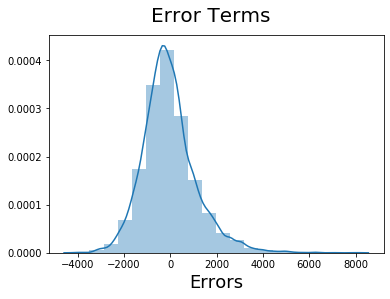

In [329]:
# Plot the histogram of the error terms - normally distrubuted
fig = plt.figure()
sns.distplot((error), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [345]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_train,sales_prediction ))
print(rmse)

1163.0311652062826


#### Test data prediction and submission

In [360]:
test_df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Age,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,107.8622,NaN,0.007565,20.750,OUT049,14,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,87.3198,NaN,0.038428,8.300,OUT017,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,241.7538,NaN,0.099575,14.600,OUT010,15,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,155.0340,NaN,0.015388,7.315,OUT017,6,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,234.2300,NaN,0.118599,13.600,OUT027,28,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [374]:
model_features = list(X.columns)
test_data = test_df[model_features]
test_predict = final_model.predict(test_data).to_frame()

In [375]:
submission = test_df[['Item_Identifier','Outlet_Identifier']]

In [376]:
submission['Item_Outlet_Sales'] = test_predict

In [400]:
submission.to_csv('submission.csv', index=False)